<a href="https://colab.research.google.com/github/guilhermeaugusto9592/programa-o_em_python/blob/main/EXECUTADO_Aula_18_Machine_Learning_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Regressão

## Machine Learning Regressão - Conceitos Básicos

Importação das bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Definindo Data Frame

In [ ]:
dados = pd.DataFrame({'fim_de_semana':[1,1,0,0,0,0,0,1,1],
                      'ensolarado':[1,1,1,1,0,0,1,0,0],
                      'temperatura':[32,35,27,21,22,30,33,35,27],
                      'numero_de_sorvetes':[98,120,18,10,12,15,60,101,115]})

In [ ]:
dados.head()

,fim_de_semana,ensolarado,temperatura,numero_de_sorvetes
0,1,1,32,98
1,1,1,35,120
2,0,1,27,18
3,0,1,21,10
4,0,0,22,12


Grafico de Dispersão

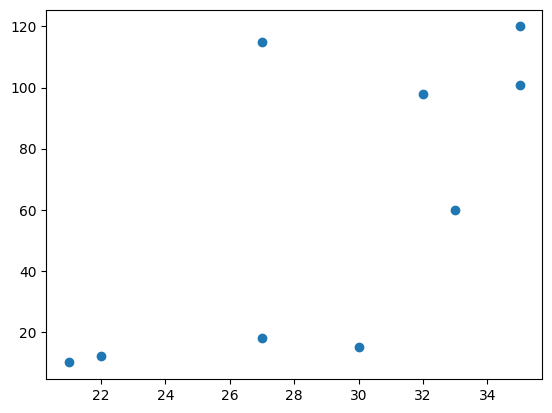

In [ ]:
plt.scatter(dados['temperatura'], dados['numero_de_sorvetes'])

Traçando linha de Regressão

In [ ]:
linha = np.polyfit(dados['temperatura'], dados['numero_de_sorvetes'], 1)
linha1 = np.poly1d(linha)

In [ ]:
linha

array([   6.32284264, -123.06497462])

In [ ]:
linha1(34)

91.91167512690365

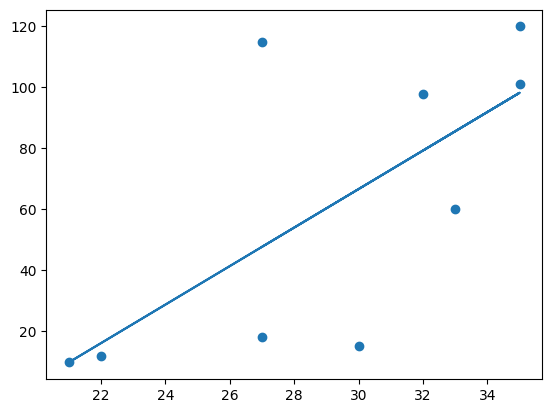

In [ ]:
plt.scatter(dados['temperatura'], dados['numero_de_sorvetes'])
plt.plot(dados['temperatura'], linha1(dados['temperatura']))
plt.show()

Teste com um Único X

In [ ]:
x1 = dados[['temperatura']]
y1 = dados['numero_de_sorvetes']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
modelo1 = LinearRegression()
modelo1.fit(x1, y1)

LinearRegression()

In [ ]:
modelo1.predict([[34]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.91167513])

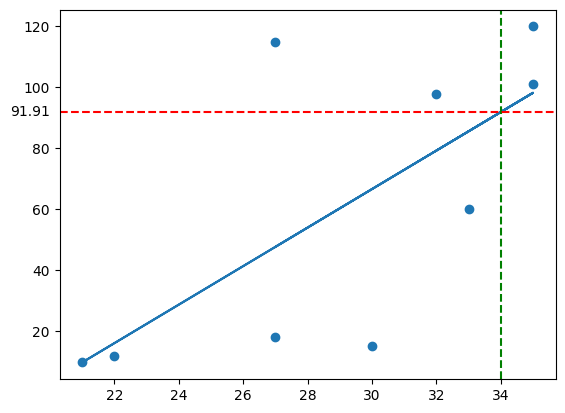

In [ ]:
plt.scatter(dados['temperatura'], dados['numero_de_sorvetes'])
plt.plot(dados['temperatura'], linha1(dados['temperatura']))
plt.axvline(x = 34, color='g', linestyle='--')
plt.axhline(y =linha1(34), color='r', linestyle='--')
plt.text(20,91.91, round(linha1(34), 2), va='center', ha='right')
plt.show()

Separando X e Y

In [ ]:
x = dados[['fim_de_semana', 'ensolarado', 'temperatura']]
y = dados['numero_de_sorvetes']

Treinamento

In [ ]:
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

Previsão

In [ ]:
teste = [1,1,34]

In [ ]:
modelo.predict([teste])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([114.82135985])

## Exemplo - Minério de Ferro X Ações da Vale

Importação de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
url2 = '/content/drive/MyDrive/Programação em Python para Data Science/dados_minerio_de_ferro.csv'
dados2 = pd.read_csv(url2, sep=';')
dados2

,Data,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Vol_xangai,Var%_xangai,Último_cingapura,Var%_cingapura,Último_vale,Abertura_vale,Máxima_vale,Mínima_vale,Vol_vale,Var%_vale
0,20/01/2023,856.5,854.5,865.5,848.0,408950.0,0.0076,123.08,0.0068,93.99,93.90,94.57,93.50,27050000.0,0.0027
1,19/01/2023,850.0,845.5,859.5,842.0,616980.0,0.0125,122.25,0.0073,93.74,93.80,94.37,93.32,21710000.0,0.0043
2,18/01/2023,839.5,835.5,848.5,831.5,622280.0,0.0066,121.37,0.0029,93.34,93.06,94.24,92.91,16740000.0,0.0131
3,17/01/2023,834.0,836.0,841.5,826.5,542980.0,-0.0142,121.02,0.0042,92.13,92.51,93.24,91.83,18720000.0,-0.0013
4,16/01/2023,846.0,859.0,863.5,830.0,1000000.0,-0.0276,120.51,-0.0249,92.25,92.00,92.39,90.83,19560000.0,-0.0167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


limpeza da base

In [ ]:
dados_nulos = dados2.isnull()
linhas_remover = dados_nulos.query('Data == True').index

In [ ]:
dados2.drop(linhas_remover, axis=0, inplace=True)

In [ ]:
dados2

,Data,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Vol_xangai,Var%_xangai,Último_cingapura,Var%_cingapura,Último_vale,Abertura_vale,Máxima_vale,Mínima_vale,Vol_vale,Var%_vale
0,20/01/2023,856.5,854.5,865.5,848.0,408950.0,0.0076,123.08,0.0068,93.99,93.90,94.57,93.50,27050000.0,0.0027
1,19/01/2023,850.0,845.5,859.5,842.0,616980.0,0.0125,122.25,0.0073,93.74,93.80,94.37,93.32,21710000.0,0.0043
2,18/01/2023,839.5,835.5,848.5,831.5,622280.0,0.0066,121.37,0.0029,93.34,93.06,94.24,92.91,16740000.0,0.0131
3,17/01/2023,834.0,836.0,841.5,826.5,542980.0,-0.0142,121.02,0.0042,92.13,92.51,93.24,91.83,18720000.0,-0.0013
4,16/01/2023,846.0,859.0,863.5,830.0,1000000.0,-0.0276,120.51,-0.0249,92.25,92.00,92.39,90.83,19560000.0,-0.0167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,11/02/2019,651.5,652.0,652.0,651.0,282460.0,0.0786,89.97,-0.0317,30.58,31.92,32.06,30.49,30700000.0,-0.0264
912,1/02/2019,604.0,587.5,623.0,586.0,1900000.0,0.0334,86.90,0.1430,33.66,33.27,33.72,33.17,21290000.0,0.0166
913,31/01/2019,584.5,592.0,594.0,576.0,1800000.0,0.0112,76.03,0.0044,33.11,34.20,34.52,33.11,39810000.0,-0.0236
914,30/01/2019,578.0,562.5,589.0,562.0,1900000.0,0.0396,75.70,0.0013,33.91,33.66,34.06,32.73,67890000.0,0.0904


Separar culunas que serão usadas no treinamento

In [ ]:
colunas_validas = dados2.drop(['Data','Vol_xangai','Var%_xangai','Último_cingapura', 'Var%_cingapura','Último_vale', 'Vol_vale', 'Var%_vale'], axis=1)
colunas_validas

,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Abertura_vale,Máxima_vale,Mínima_vale
0,856.5,854.5,865.5,848.0,93.90,94.57,93.50
1,850.0,845.5,859.5,842.0,93.80,94.37,93.32
2,839.5,835.5,848.5,831.5,93.06,94.24,92.91
3,834.0,836.0,841.5,826.5,92.51,93.24,91.83
4,846.0,859.0,863.5,830.0,92.00,92.39,90.83
...,...,...,...,...,...,...,...
911,651.5,652.0,652.0,651.0,31.92,32.06,30.49
912,604.0,587.5,623.0,586.0,33.27,33.72,33.17
913,584.5,592.0,594.0,576.0,34.20,34.52,33.11
914,578.0,562.5,589.0,562.0,33.66,34.06,32.73


Treinamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, median_absolute_error

In [ ]:
x = colunas_validas.drop(['Máxima_vale'], axis=1)

y = colunas_validas.Máxima_vale

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.1, random_state=1)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_treino, y_treino)

LinearRegression()

Previsão

In [ ]:
previsao_lr = lr.predict(x_teste)
previsao_lr

array([60.01650201, 39.90584099, 85.60981907, 92.08288779, 36.89029612,
       93.10502188, 34.6967428 , 74.82146166, 36.01866641, 67.21494636,
       31.19045089, 36.14448151, 71.5098486 , 38.95507636, 41.91833496,
       78.7515784 , 48.46727962, 70.61546158, 49.71040664, 38.26402979,
       35.28314434, 94.81790862, 45.19775814, 87.89824753, 40.57603184,
       80.07924698, 97.24873795, 82.4479531 , 86.34277375, 63.58908679,
       83.08019317, 73.83705329, 46.22348357, 32.11695012, 32.8166528 ,
       68.17632265, 32.87314337, 87.14121235, 93.84214211, 93.7608448 ,
       80.64308571, 60.99268562, 77.73553571, 41.48963149, 67.03802812,
       68.79192224, 48.85743826, 95.65919868, 94.56092342, 40.38026814,
       33.52587072, 89.51046898, 65.58693598, 46.82670843, 79.63209084,
       37.24047005, 81.10251391, 41.46049493, 38.73820449, 65.33191872,
       34.38141673, 83.34608316, 45.64677927, 90.68913343, 65.84085824,
       78.75445467, 91.14999044, 35.02081478, 35.79076166, 42.34

Metricas

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [ ]:
r2_lr = r2_score(y_teste, previsao_lr)
r2_lr

0.9992963196938308

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html

In [ ]:
median_absolute_error(y_teste, previsao_lr)

0.30956814174004066

In [ ]:
colunas_validas.columns

Index(['Último_xangai', 'Abertura_xangai', 'Máxima_xangai', 'Mínima_xangai',
       'Abertura_vale', 'Máxima_vale', 'Mínima_vale'],
      dtype='object')

In [ ]:
dados_p_prever = pd.DataFrame({'Último_xangai':[825], 'Abertura_xangai':[827.5],
                               'Máxima_xangai':[830.5],'Mínima_xangai':[816],
                               'Abertura_vale':[56.45],'Mínima_vale':[56.01]})

In [ ]:
dados_p_prever

,Último_xangai,Abertura_xangai,Máxima_xangai,Mínima_xangai,Abertura_vale,Mínima_vale
0,825,827.5,830.5,816,56.45,56.01


In [ ]:
previsao_para_hoje = lr.predict(dados_p_prever)

In [ ]:
previsao_para_hoje

array([57.28827303])

## Machine Learning - Exercício

Elaborar um treinamento de máquina para as ações da petrobras e a cotação do valor do Petróleo em Londres, de acordo com a base de dados fornecida.

Importação de dados

In [ ]:
import pandas as pd

url_petr = '/content/drive/MyDrive/Programação em Python para Data Science/PETR3 Dados Históricos.csv'
url_brent = '/content/drive/MyDrive/Programação em Python para Data Science/Petróleo Brent Futuros Dados Históricos.csv'

dados_petr = pd.read_csv(url_petr, sep=';')
dados_brent = pd.read_csv(url_brent, sep=';')




In [ ]:
dados_petr.head()

,Data,Último,Abertura,Máxima,Mínima
0,02.01.2018,17.10,16.77,17.10,16.76
1,03.01.2018,17.32,17.01,17.44,16.98
2,04.01.2018,17.47,17.44,17.67,17.40
3,05.01.2018,17.61,17.46,17.62,17.37
4,08.01.2018,17.88,17.41,17.88,17.38


In [ ]:
dados_brent.head()

,Data,Último,Abertura,Máxima,Mínima
0,02.01.2018,66.57,66.55,67.29,66.24
1,03.01.2018,67.84,66.54,68.03,66.40
2,04.01.2018,68.07,67.89,68.27,67.62
3,05.01.2018,67.62,67.97,68.11,67.26
4,08.01.2018,67.78,67.80,67.99,67.44


Limpeza da base

In [ ]:
dados_petr.columns

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [ ]:
dados_petr.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)

In [ ]:
dados_brent.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [ ]:
dados_petr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1354 non-null   object 
 1   Último    1354 non-null   float64
 2   Abertura  1354 non-null   float64
 3   Máxima    1354 non-null   float64
 4   Mínima    1354 non-null   float64
dtypes: float64(4), object(1)
memory usage: 53.1+ KB


In [ ]:
dados_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1410 non-null   object 
 1   Último    1410 non-null   float64
 2   Abertura  1410 non-null   float64
 3   Máxima    1410 non-null   float64
 4   Mínima    1410 non-null   float64
dtypes: float64(4), object(1)
memory usage: 55.2+ KB


In [ ]:
dados_petr

,Data,Último,Abertura,Máxima,Mínima
0,02.01.2018,17.10,16.77,17.10,16.76
1,03.01.2018,17.32,17.01,17.44,16.98
2,04.01.2018,17.47,17.44,17.67,17.40
3,05.01.2018,17.61,17.46,17.62,17.37
4,08.01.2018,17.88,17.41,17.88,17.38
...,...,...,...,...,...
1349,12.06.2023,34.18,33.75,34.41,33.57
1350,13.06.2023,32.30,32.78,32.78,31.99
1351,14.06.2023,33.69,32.47,33.69,32.35
1352,15.06.2023,33.19,33.65,34.40,33.07


In [ ]:
linha_nula = dados_petr.isnull().query('Data == True').index

In [ ]:
dados_petr.drop(linha_nula, axis=0, inplace=True)

Juntar os dataframes

In [ ]:
df_juntos = pd.merge(dados_petr, dados_brent, on='Data', suffixes=['_petr', '_brent'])

In [ ]:
df_juntos.head()

,Data,Último_petr,Abertura_petr,Máxima_petr,Mínima_petr,Último_brent,Abertura_brent,Máxima_brent,Mínima_brent
0,02.01.2018,17.10,16.77,17.10,16.76,66.57,66.55,67.29,66.24
1,03.01.2018,17.32,17.01,17.44,16.98,67.84,66.54,68.03,66.40
2,04.01.2018,17.47,17.44,17.67,17.40,68.07,67.89,68.27,67.62
3,05.01.2018,17.61,17.46,17.62,17.37,67.62,67.97,68.11,67.26
4,08.01.2018,17.88,17.41,17.88,17.38,67.78,67.80,67.99,67.44


Criar grafico de correlação

In [ ]:
dados = df_juntos.drop(['Data'], axis = 1)

In [ ]:
dados.head()

,Último_petr,Abertura_petr,Máxima_petr,Mínima_petr,Último_brent,Abertura_brent,Máxima_brent,Mínima_brent
0,17.10,16.77,17.10,16.76,66.57,66.55,67.29,66.24
1,17.32,17.01,17.44,16.98,67.84,66.54,68.03,66.40
2,17.47,17.44,17.67,17.40,68.07,67.89,68.27,67.62
3,17.61,17.46,17.62,17.37,67.62,67.97,68.11,67.26
4,17.88,17.41,17.88,17.38,67.78,67.80,67.99,67.44


In [ ]:
correlacao = dados.corr()
correlacao

,Último_petr,Abertura_petr,Máxima_petr,Mínima_petr,Último_brent,Abertura_brent,Máxima_brent,Mínima_brent
Último_petr,1.000000,0.996868,0.998491,0.998687,0.442004,0.442908,0.440318,0.446054
Abertura_petr,0.996868,1.000000,0.998729,0.998245,0.439953,0.442345,0.439541,0.444548
Máxima_petr,0.998491,0.998729,1.000000,0.998045,0.441381,0.443015,0.440702,0.445508
Mínima_petr,0.998687,0.998245,0.998045,1.000000,0.439708,0.441061,0.438103,0.444309
Último_brent,0.442004,0.439953,0.441381,0.439708,1.000000,0.996166,0.997569,0.998599
Abertura_brent,0.442908,0.442345,0.443015,0.441061,0.996166,1.000000,0.998318,0.997360
Máxima_brent,0.440318,0.439541,0.440702,0.438103,0.997569,0.998318,1.000000,0.996721
Mínima_brent,0.446054,0.444548,0.445508,0.444309,0.998599,0.997360,0.996721,1.000000


<Axes: >

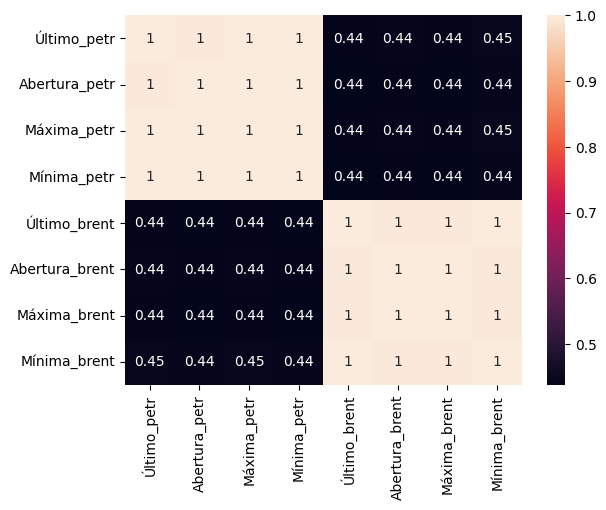

In [ ]:
import seaborn as sns
sns.heatmap(correlacao, annot=True)


Treinamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Separação de dados em x e y

x = dados.drop(['Máxima_petr'], axis=1)

y = dados.Máxima_petr


In [ ]:
# Separação de dados em treino e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.10)

In [ ]:
# treinamento

modelo = LinearRegression()
modelo.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
previsao = modelo.predict(x_teste)

In [ ]:
r2 = r2_score(y_teste, previsao)
r2

0.9989773054296728

In [ ]:
x.columns

Index(['Último_petr', 'Abertura_petr', 'Mínima_petr', 'Último_brent',
       'Abertura_brent', 'Máxima_brent', 'Mínima_brent'],
      dtype='object')

In [ ]:
dados_prever = pd.DataFrame({
    'Último_petr':[37.43],
    'Abertura_petr':[37.35],
    'Mínima_petr':[37.18],
    'Último_brent':[71.04],
    'Abertura_brent':[70.99],
    'Máxima_brent':[71.17],
    'Mínima_brent':[68.35]})
dados_prever



,Último_petr,Abertura_petr,Mínima_petr,Último_brent,Abertura_brent,Máxima_brent,Mínima_brent
0,37.43,37.35,37.18,71.04,70.99,71.17,68.35


In [ ]:
modelo.predict(dados_prever)

array([37.74085024])